# Fraud Detection Prediction - Regression Model
This notebook demonstrates step-by-step regression modeling using `fraud_detection.csv` dataset.
We use Linear Regression for prediction.

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset

In [2]:
df = pd.read_csv('fraud_regression_dataset.csv')
df.head()

,transaction_amount,account_age_days,num_prev_transactions,avg_transaction_amount,location_risk_score,device_risk_score,fraud_risk_score
0,140.780427,2429,142,34.638670,0.891200,0.213142,0.095825
1,903.036429,1031,190,39.737938,0.013634,0.867177,0.358377
2,395.023708,29,532,20.680263,0.322727,0.955843,0.269041
3,273.882766,907,226,325.437001,0.554357,0.236715,0.210230
4,50.887461,2127,312,26.028684,0.148217,0.882615,0.085633


## Step 3: Dataset Information

In [3]:
print('Shape:', df.shape)
print('\nInfo:')
print(df.info())
print('\nDescribe:')
print(df.describe())

Shape: (1200, 7)

Info:
<class 'pandas.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      1200 non-null   float64
 1   account_age_days        1200 non-null   int64  
 2   num_prev_transactions   1200 non-null   int64  
 3   avg_transaction_amount  1200 non-null   float64
 4   location_risk_score     1200 non-null   float64
 5   device_risk_score       1200 non-null   float64
 6   fraud_risk_score        1200 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 65.8 KB
None

Describe:
       transaction_amount  account_age_days  num_prev_transactions  \
count         1200.000000       1200.000000            1200.000000   
mean           301.814472       1273.463333             410.780833   
std            299.791251        723.221268             228.061643   
min              1.392835          2.000000              

## Step 4: Handle Missing Values

In [4]:
df = df.dropna()
print('Missing values removed')

Missing values removed


## Step 5: Convert Categorical Columns to Numeric

In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,transaction_amount,account_age_days,num_prev_transactions,avg_transaction_amount,location_risk_score,device_risk_score,fraud_risk_score
0,140.780427,2429,142,34.638670,0.891200,0.213142,0.095825
1,903.036429,1031,190,39.737938,0.013634,0.867177,0.358377
2,395.023708,29,532,20.680263,0.322727,0.955843,0.269041
3,273.882766,907,226,325.437001,0.554357,0.236715,0.210230
4,50.887461,2127,312,26.028684,0.148217,0.882615,0.085633


## Step 6: Select Features and Target

In [6]:
# Using last column as target
target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]
print('Target column:', target)

Target column: fraud_risk_score


## Step 7: Split Data into Training and Testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (960, 6)
Testing size: (240, 6)


## Step 8: Train Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Model trained successfully')

Model trained successfully


## Step 9: Make Predictions

In [9]:
y_pred = model.predict(X_test)
print('Predictions:', y_pred[:10])

Predictions: [0.20137101 0.20457348 0.23321405 0.09035746 0.0903274  0.22982364
 0.16505222 0.17809601 0.39270591 0.19289409]


## Step 10: Evaluate Regression Model

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 2.7197024387697388e-05
R2 Score: 0.9980668152405665


## Step 11: Visualization

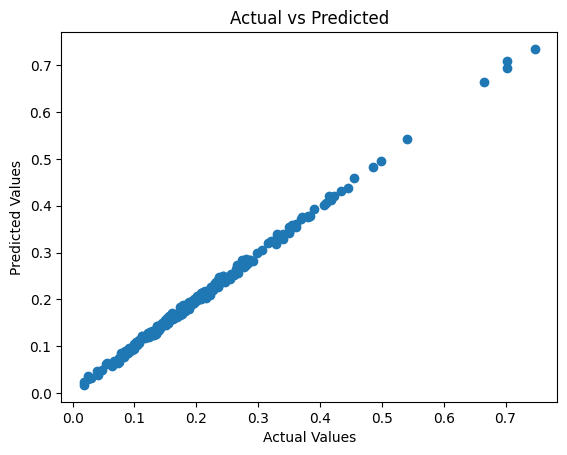

In [11]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()